<a href="https://colab.research.google.com/github/jahid-fahim/MachineLearningProject/blob/main/CNN_Implementation(CIFAR-10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

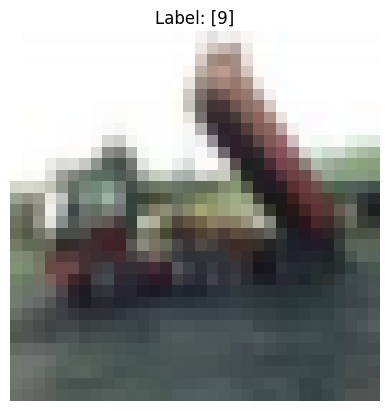

In [5]:
plt.imshow(x_train[2])
plt.title(f"Label: {y_train[2]}")
plt.axis('off')
plt.show()

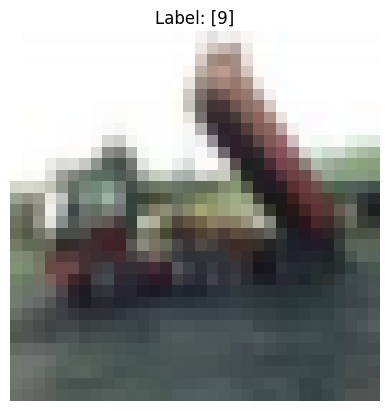

In [6]:
plt.imshow(x_train[2], cmap='gray')
plt.title(f"Label: {y_train[2]}")
plt.axis('off')
plt.show()

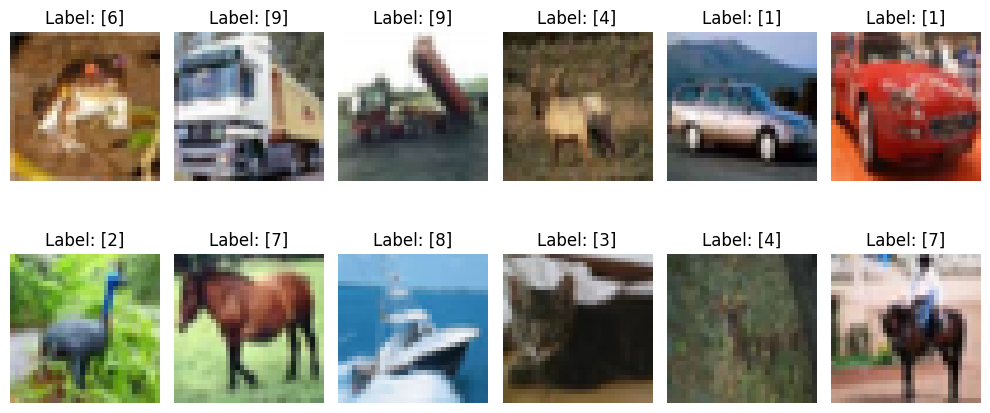

In [7]:
plt.figure(figsize=(10, 5))
for i in range(12):
  plt.subplot(2, 6, i+1)
  plt.imshow(x_train[i])
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

# Noemalize pixel values to the range(0,1)

In [8]:
x_train, x_test = (x_train / 255.0), (x_test / 255.0)

# Convert Labels into 1D arrays

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# Create the model

In [12]:
cnn_model = models.Sequential()

# First convolutional Block

In [13]:
cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2))) # DOwnsampling

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Second convolutional Block

In [14]:
cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))

# Third convolutional Block

In [15]:
cnn_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())

# Fully connected Layer

In [16]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Print Model Summary

In [17]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

# Compile the model

In [19]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [20]:
history = cnn_model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.2,) # verbose=2

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 133ms/step - accuracy: 0.3665 - loss: 2.0340 - val_accuracy: 0.4944 - val_loss: 1.4412
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 131ms/step - accuracy: 0.5776 - loss: 1.2070 - val_accuracy: 0.4589 - val_loss: 1.6207
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.6440 - loss: 1.0135 - val_accuracy: 0.5773 - val_loss: 1.2331
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 165ms/step - accuracy: 0.6954 - loss: 0.8695 - val_accuracy: 0.6355 - val_loss: 1.1003
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 140ms/step - accuracy: 0.7291 - loss: 0.7847 - val_accuracy: 0.6443 - val_loss: 1.0634
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.7520 - loss: 0.7063 - val_accuracy: 0.7083 - val_loss: 0.8516
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.7800 - loss: 0.6281 - val_accuracy: 0.6479 - val_loss: 1.0996
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 133ms/step - accuracy: 0.7923 - loss

#Evaluate on test data

In [21]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test) # verbose=2
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6864 - loss: 1.0124
Test accuracy: 0.6822999715805054


In [22]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


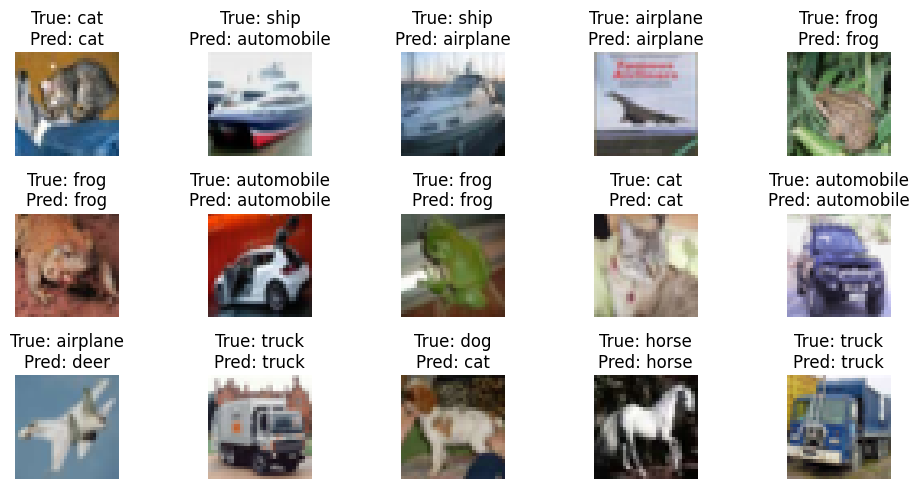

In [23]:
sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

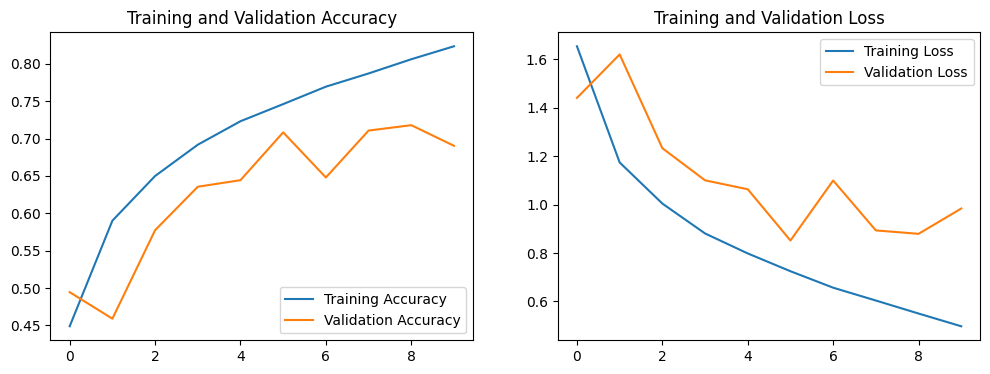

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


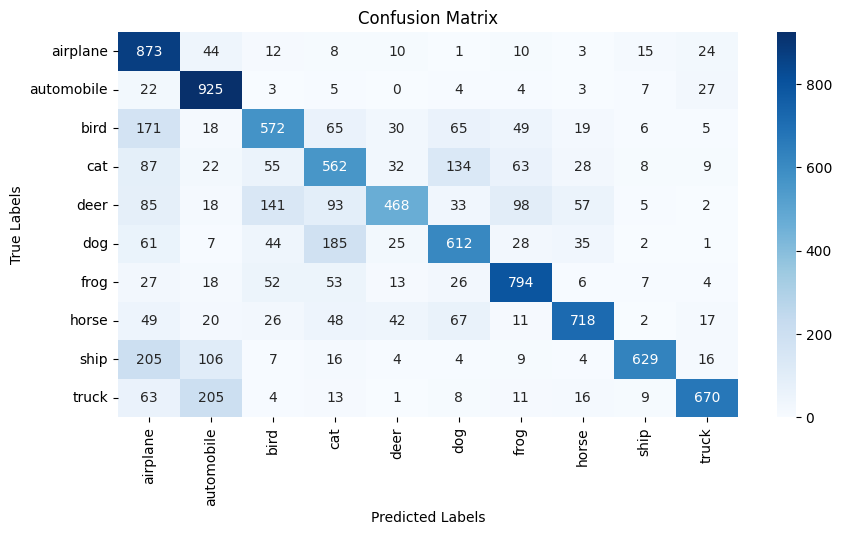

In [25]:
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report

In [26]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.53      0.87      0.66      1000
  automobile       0.67      0.93      0.78      1000
        bird       0.62      0.57      0.60      1000
         cat       0.54      0.56      0.55      1000
        deer       0.75      0.47      0.58      1000
         dog       0.64      0.61      0.63      1000
        frog       0.74      0.79      0.76      1000
       horse       0.81      0.72      0.76      1000
        ship       0.91      0.63      0.74      1000
       truck       0.86      0.67      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.71      0.68      0.68     10000



#Save the model

In [27]:
cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


# Load and use the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


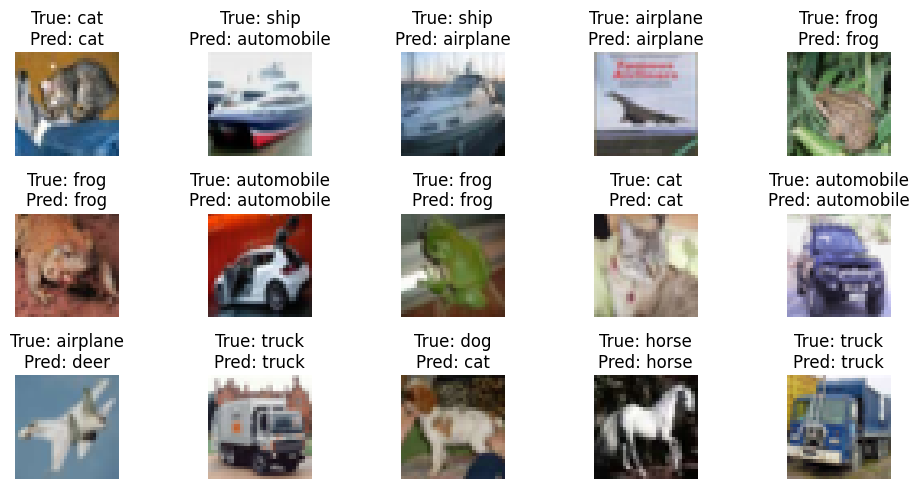

In [28]:
loaded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()